<a href="https://colab.research.google.com/github/financieras/math/blob/main/regresion/regresion_lineal05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precio de coches de segunda mano en función del kilometraje
## Regresión lineal por descenso del gradiente método no matricial.
* Caso **NORMALIZANDO**
* Calcularemos $R^2$ para valorar la bondad del ajuste


In [ ]:
# obtenemos el archivo data.csv que queda en local para poder usarlo desde este notebook
!wget https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv

--2024-11-01 06:53:06--  https://raw.githubusercontent.com/financieras/math/main/regresion/ft-linear-regression/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281 [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]     281  --.-KB/s    in 0s      

2024-11-01 06:53:06 (14.4 MB/s) - ‘data.csv.2’ saved [281/281]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('data.csv')    # df representa el DataFrame

# Crear el array X (kilómetros) como vector unidimensional
X = df['km'].values

# Crear el array Y (precios)
Y = df['price'].values

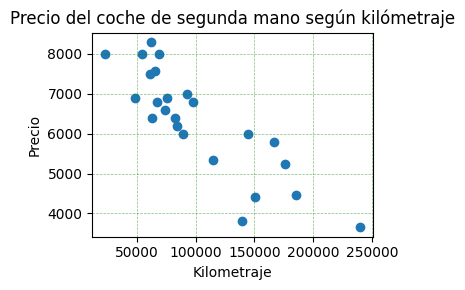

In [ ]:
plt.figure(figsize=(4, 3))  # Crear una figura con Ancho: 4, Alto: 3
plt.scatter(X, Y)
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Precio del coche de segunda mano según kilómetraje')
plt.grid(color='green', linestyle='--', linewidth=0.5, alpha=0.5)
# Ajustar los márgenes
plt.tight_layout()
plt.show()

## Algoritmo del descenso del gradiente. Método no matricial

In [ ]:
# Normalización de X e Y
X_mean, X_std = np.mean(X), np.std(X)
Y_mean, Y_std = np.mean(Y), np.std(Y)

X_norm = (X - X_mean) / X_std
Y_norm = (Y - Y_mean) / Y_std

# Parámetros de la regresión
theta1_norm = 0  # Pendiente inicial normalizada
theta0_norm = 0  # Intercepto inicial normalizado

# Configuración del algoritmo
learning_rate = 0.01
num_iterations = 1000

# Implementación del descenso del gradiente con datos normalizados
for _ in range(num_iterations):
    # Calcular las predicciones actuales
    Y_pred_norm = theta1_norm * X_norm + theta0_norm

    # Calcular los gradientes
    m = len(X)  # número de muestras
    D_theta1_norm = (1/m) * np.sum(X_norm * (Y_pred_norm - Y_norm))
    D_theta0_norm = (1/m) * np.sum(Y_pred_norm - Y_norm)

    # Actualizar los parámetros
    theta1_norm -= learning_rate * D_theta1_norm
    theta0_norm -= learning_rate * D_theta0_norm

# Desnormalización de los parámetros
theta1 = theta1_norm * (Y_std / X_std)
theta0 = Y_mean - theta1 * X_mean + theta0_norm * Y_std

print(f"Intercepto (theta0): {theta0}")
print(f"Pendiente (theta1): {theta1}")

Intercepto (theta0): 8499.506064757234
Pendiente (theta1): -0.02144803761318838


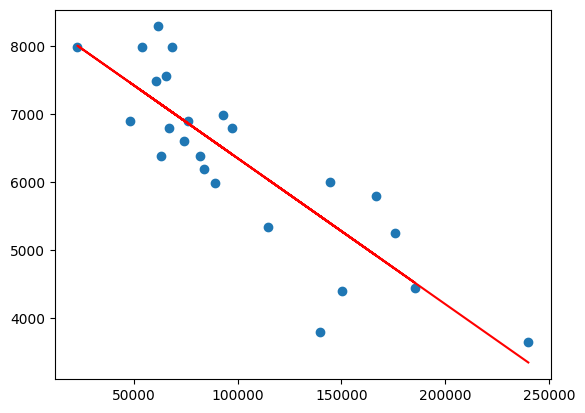

In [ ]:
plt.scatter(X, Y)
plt.plot(X, theta0 + theta1 * X, color='red')
plt.show()

## Medir al bondad del ajuste con $R^2$

In [ ]:
# Calcular predicciones con los parámetros finales
Y_pred = theta1 * X + theta0

# Cálculo de R²
ss_res = np.sum((Y - Y_pred) ** 2)  # Suma de residuos al cuadrado
ss_tot = np.sum((Y - Y_mean) ** 2)  # Suma total de cuadrados
r_squared = 1 - (ss_res / ss_tot)

print(f"R²: {r_squared:.4f}")

R²: 0.7330
